## GRIP @ The Sparks Foundation

## Name : Lahari Boni

## Task 1:

## Objective - To predict the score of a student based on the number of study hours

## Steps Involved:

## 1.Data Acquisition 

### 1.1 Importing necessary packages

In [62]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as stat_model
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

### 1.2 Reading the data from dataset

In [63]:
data=pd.read_csv("http://bit.ly/w-data")

### 1.3 Retrieving the dimensionality of the data frame

In [64]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns")


The dataset has 25 rows and 2 columns


### 1.4 To display the first 5 and last 5 records of the dataset

In [65]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [66]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## 2. Data Preprocessing & Preparation

### 2.1 To retrieve general characteristics of the dataset

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 2.2 To retrieve statistical characteristics of the dataset

In [68]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 2.3 Checking for unique data values

In [69]:
print(data['Hours'].unique())

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 1.9 6.1
 7.4 4.8 3.8 6.9 7.8]


In [70]:
print(data['Scores'].unique())

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 24 67 69 54 35 76 86]


### 2.4 Checking for missing values in the dataset

In [71]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### 2.5 Checking for duplicate values in the dataset

In [73]:
data.duplicated().sum()

0

### 3. Exploratory Data Analysis

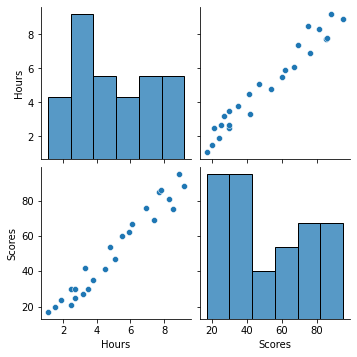

In [74]:
sns.pairplot(data)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

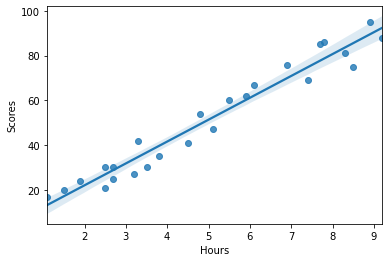

In [75]:
sns.regplot(x=data['Hours'],y=data['Scores'])

<AxesSubplot:>

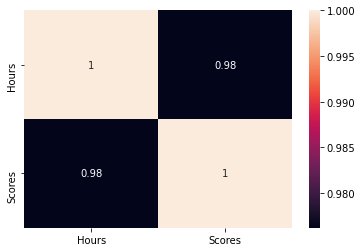

In [76]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='Hours'>

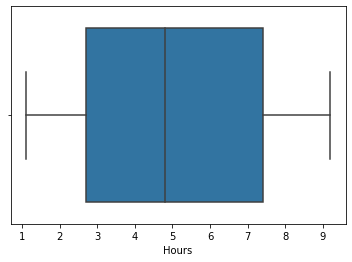

In [77]:
sns.boxplot(data['Hours'])

<AxesSubplot:xlabel='Scores'>

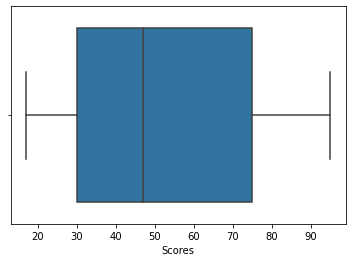

In [78]:
sns.boxplot(data['Scores'])

## 4.Model Bulding

In [79]:
x = data.iloc[:,0:-1].values
y = data.iloc[:,1].values


### 4.1 Splitting the dataset into train set and test set

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

### 4.2 Training the data using Linear Regression


In [81]:
regressor=stat_model.OLS(y_train,x_train).fit()

### 4.3 Comparing predicted values with respect to the actual values

In [82]:
prediction=regressor.predict(x_test)

In [83]:
predict_show=pd.DataFrame({'Actual Score':y_test,'Predicted Score':prediction})
print(predict_show)

   Actual Score  Predicted Score
0            20        15.351246
1            27        32.749324
2            69        75.732812
3            30        25.585409
4            62        60.381566
5            35        38.889822
6            24        19.444911


### 4.4 Summary of the model

In [84]:
regressor.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.991   
Dependent Variable:     y                AIC:                         116.1127
Date:                   2021-06-21 00:18 BIC:                         117.0031
No. Observations:       18               Log-Likelihood:              -57.056 
Df Model:               1                F-statistic:                 1952.   
Df Residuals:           17               Prob (F-statistic):          5.49e-19
R-squared (uncentered): 0.991            Scale:                       35.124  
-----------------------------------------------------------------------------------
             Coef.       Std.Err.         t         P>|t|       [0.025       0.975]
-----------------------------------------------------------------------------------
x1          10.2342        0.2316      44.1838      0.0000      9.7455      10.7229
------------------------------------------------------------------------------
Omnibus:                  2.321             Durbin-Watson:               1.866
Prob(Omnibus):            0.313             Jarque-Bera (JB):            1.425
Skew:                     -0.427            Prob(JB):                    0.491
Kurtosis:                 1.919             Condition No.:               1    
==============================================================================

"""

## 5. Predicting the score for 9.25 hours of study using the model

In [85]:
Hours=9.25
Score=regressor.predict(Hours)
int_score=int(Score)
print(f"The predicted score is {int_score} if the student studies for {Hours} a day")

The predicted score is 94 if the student studies for 9.25 a day
